In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [115]:
X = iris.data
y = iris.target

In [116]:
non_versicolor_labels = [0 for i in range(100)]
versicolor_labels = [1 for i in range(50)]

In [117]:
y = np.concatenate([non_versicolor_labels, versicolor_labels])

In [118]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [119]:
perm = np.random.permutation(150)

In [120]:
X[perm].shape

(150, 4)

In [121]:
X_train, X_test = X[perm][20:], X[perm][:20]
y_train, y_test = y[perm][20:], y[perm][:20]

In [122]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((130, 4), (130,), (20, 4), (20,))

In [123]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [124]:
versicolor = y_train==1
not_versicolor = (y_train==0)

In [126]:
versicolor.shape

(130,)

In [127]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [128]:
y_test.shape

(20, 1)

In [129]:
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

In [138]:
X_train[np.ix_(versicolor,)][:,0]

array([5.9, 4.9, 5.6, 5.8, 5.5, 5.4, 5.7, 5.7, 6.4, 5.8, 6.9, 6.1, 5.1,
       6.6, 5. , 5. , 6.3, 5.8, 5.4, 5.6, 5.5, 5.5, 6.1, 6.1, 6. , 6.7,
       5.2, 6. , 5.1, 6.7, 4.9, 5. , 5.3, 5.6, 5.6, 5.1, 5.6, 5.1, 5.7,
       4.8, 4.9, 5.1, 4.5, 5.6])

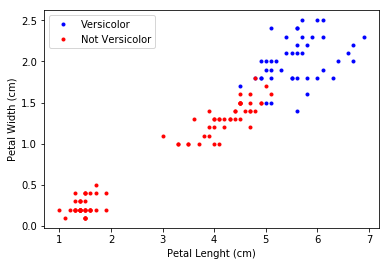

In [140]:
plt.plot(X_train[np.ix_(versicolor,)][:,0], X_train[np.ix_(versicolor,)][:,1], 'b.')
plt.plot(X_train[np.ix_(not_versicolor,)][:,0], X_train[np.ix_(not_versicolor,)][:,1], 'r.')
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(['Versicolor','Not Versicolor'])
plt.show()

In [141]:
def sigmoid(Z):
    return 1 / (1+np.e**(-Z))

In [142]:
def logistic_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

In [145]:
W  = np.zeros((2,1))
b = np.zeros((1,1))
learning_rate = 0.01

In [146]:
m = len(y_train)

for epoch in range(5000):
    Z = np.matmul(X_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(y_train, A)
    dz = A - y_train
    dW = 1/m * np.matmul(X_train.T, dz)
    db = np.sum(dz)
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if epoch % 100==0:
        print(loss)

0.6931471805599453
0.42862281330489815
0.35243524257499437
0.3133411389309735
0.28836009944489205
0.27035986933549294
0.2564236484496045
0.24512146058504994
0.23565853777186435
0.22755101162530467
0.22048335157900456
0.21423855013173998
0.20866093057618676
0.20363495003435894
0.19907243134763436
0.1949045087949216
0.19107634506185373
0.1875435482860442
0.18426967104455963
0.18122442025829352
0.17838234750568155
0.17572187211855791
0.1732245399252704
0.1708744521675821
0.168657819492006
0.16656260933677028
0.16457826406489623
0.1626954733868379
0.16090598893906896
0.15920247195156012
0.15757836714480522
0.15602779760824867
0.15454547660267146
0.15312663311934308
0.15176694870154644
0.15046250354766647
0.14920973031073922
0.14800537431689487
0.14684645916608957
0.14573025686875124
0.14465426182321883
0.14361616805991878
0.1426138492757353
0.14164534126104106
0.14070882638622284
0.1398026198672656
0.13892515757335416
0.1380749851753474
0.1372507484638015
0.13645118469009207


In [147]:
W, b

(array([[2.64468422],
        [1.7653555 ]]), array([[-15.90063035]]))

In [148]:
preds = []
for i in sigmoid(Z):
    if i > 0.5:
        preds.append(1)
    else: 
        preds.append(0)

In [150]:
from sklearn.metrics import f1_score

In [151]:
f1_score(preds, y_train)

0.942528735632184

(-1, 3)

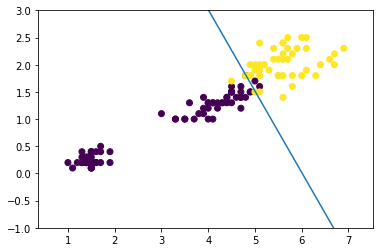

In [152]:
plt.scatter(X_train[:,0], X_train[:,1], c =y_train.ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b)/W[1][0]
plt.plot(xvals, yvals)
plt.ylim(-1,3)

In [153]:
test_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        test_preds.append(1)
    if i < 0.5:
        test_preds.append(0)

In [160]:
test_preds

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [161]:
print(*y_test)

[1] [0] [0] [1] [0] [1] [0] [1] [0] [0] [0] [1] [1] [0] [0] [0] [0] [0] [0] [0]


(-1, 3)

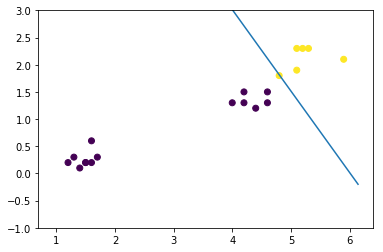

In [163]:
plt.scatter(X_test[:,0], X_test[:,1], c =y_test.ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b)/W[1][0]
plt.plot(xvals, yvals)
plt.ylim(-1,3)